# Correlation Between Corruption and Food Prices
By Harshal Patel, Sabrina Almazan, Isis Kazadi, Katie Rink

Here we will write what we are attempting to do

In [6]:
#imports
import pandas as pd
import numpy as np

### Creating Datasets
- [FAO Food Price Index from the Food and Agriculture Organization of the United States](https://www.fao.org/worldfoodsituation/foodpricesindex/en/) <br>
- [Corruption Perception Index from Transparency International](https://www.transparency.org/en/cpi/2021) <br><br>

To find the correlation, if any, between the corruption levels in the government and the food prices in the country, we found a dataset of the FAO Food Price Index from the Food and Agriculture Organization of the United States. Within this dataset, we can find information about Country, the location within the country, the market name, the name of the item being sold, the price, and the date. Each data point is taken monthly from the years between 2013 to 2020. From this data, we will only utilize the Country, name, price, and date of each item. 
Additionally we utilized the Corruption Perception Index from Transparency International. From this dataset, we gain information on the country and region, the corruption perception index score, the rank, the number of sources, and the standard error for every year from 2020-2012. From this data, we will only utilize the Country and the CPI score.

In [7]:
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)

### Clean Data
In order to assume that the data we analyzed was an accurate sample to be able to draw a conclusion from about all countries. By cross-referencing the CPI-scores with our data on prices, we chose to use Sudan, Mexico, China, Iraq, and Ethiopia, due to their corruption levels being well spread to allow a full range of understanding of corruption’s effect. 

In [4]:
#Cleaning Values for Price Data
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + PriceData.mp_month.astype(str) + '/01')
#Only include chosen countries
PriceData = PriceData[PriceData['adm0_name'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include Chosen Years
PriceData = PriceData[PriceData["date"].isin(pd.date_range('2013-01-01','2021-01-01'))]

#Drop unused columns
PriceData = PriceData.drop('mp_year', 1)
PriceData = PriceData.drop('mp_month', 1)
PriceData = PriceData.drop('adm1_id', 1)
PriceData = PriceData.drop('adm1_name', 1)
PriceData = PriceData.drop('mkt_id', 1)
PriceData = PriceData.drop('mkt_name', 1)
PriceData = PriceData.drop('cur_id', 1)
PriceData = PriceData.drop('cur_name', 1)
PriceData = PriceData.drop('pt_id', 1)
PriceData = PriceData.drop('pt_name', 1)
PriceData = PriceData.drop('um_id', 1)
PriceData = PriceData.drop('um_name', 1)
PriceData = PriceData.drop('mp_commoditysource', 1)
#Put all values to lower case
PriceData = PriceData.applymap(lambda s: s.lower() if type(s) == str else s)
Categories = Categories.applymap(lambda s: s.lower() if type(s) == str else s)
#Shorten the names of the cm_name
PriceData['cm_name'] = PriceData['cm_name'].str.split(' -').str.get(0)
PriceData['cm_name'] = PriceData['cm_name'].str.split(' \(').str.get(0)
#Shorten all names in food types list
Categories['Fruits/Vegetables'] = Categories['Fruits/Vegetables'].str.split(' \(').str.get(0)
Categories['Dairy'] = Categories['Dairy'].str.split(' \(').str.get(0)
Categories['Grains'] = Categories['Grains'].str.split(' \(').str.get(0)
Categories['Meat'] = Categories['Meat'].str.split(' \(').str.get(0)
#renaming column headers to more understandable
PriceData.rename(columns={'adm0_id': 'Country_ID', 'adm0_name': 'Country', 'cm_id':'Item_ID','cm_name':'Item','mp_price':'price'}, inplace=True)

#Create a value of year value to allow merge
PriceData['Year'] = pd.DatetimeIndex(PriceData['date']).year

PriceData.head()

,Country_ID,Country,Item_ID,Item,price,date,Year
417258,52.0,china,84,wheat,2.6567,2014-01-01,2014
417259,52.0,china,84,wheat,2.6100,2014-02-01,2014
417260,52.0,china,84,wheat,2.6160,2014-03-01,2014
417261,52.0,china,84,wheat,2.5700,2014-04-01,2014
417262,52.0,china,84,wheat,2.5400,2014-05-01,2014


In [5]:
#Cleaning Data for corruptiong index
#Only include chosen countries
CorruptData = CorruptData[CorruptData['Country'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include chosen years
CorruptData = CorruptData.filter(regex='2013|2014|2015|2016|2017|2018|2019|2020|Country')
#Only looking at CPI score
CorruptData = CorruptData.filter(regex='Country|CPI')
#Make all values lower case
CorruptData = CorruptData.applymap(lambda s: s.lower() if type(s) == str else s)

#Correct Indexes
CorruptData = CorruptData.reset_index()

#Make header years only
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI Score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace(' ', ''))

#Create new dataset making year and country columns to graph
modified = CorruptData.filter(['Country'], axis=1)
modified = pd.concat([modified]*8, ignore_index=True)
modified = modified.sort_values(by='Country')
modified.insert(1, 'Year', [2013, 2014, 2015, 2016, 2017,2018,2019,2020]*5)
modified['CPI Score'] = ''

for index, row in modified.iterrows():
    modified.set_value(index,'CPI Score', CorruptData.loc[CorruptData['Country'] == row['Country']][str(row['Year'])].values[0])
    
modified.head()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Country,Year,CPI Score
0,china,2013,40
30,china,2014,36
25,china,2015,37
5,china,2016,40
20,china,2017,41


In [6]:
#Merge Datasets together for futher analysis
MergedData = pd.merge(PriceData, modified, on=['Country','Year'])

### Overall Analysis
As we can see from the general trends, the CPI score tends to stay fairly constant, whereas the price does not. However, due to the massive difference in the size of the values, it is hard to see any correlation on the graphs. So we calculated the pairwise correlation between each of the values using the Pearson method. Given that a perfect correlation is equivalent to 1, we can see that China, Ethiopia, and Iraq all have relatively high correlations between their CPI score and their average price. Whereas Mexico has a very low correlation. Given the two that did not have high correlation levels, both had relatively high export rates, which can cause an increase in demand to allow prices to remain lower despite high corruption levels. Thus there does appear to be some form of correlation between increased corruption levels in a country’s government and increased prices of products from said country.

In [7]:
#Datasets based on Country
SudanData = MergedData[MergedData['Country'].isin(['sudan'])]
MexicoData = MergedData[MergedData['Country'].isin(['mexico'])]
ChinaData = MergedData[MergedData['Country'].isin(['china'])]
IraqData = MergedData[MergedData['Country'].isin(['iraq'])]
EthiopiaData = MergedData[MergedData['Country'].isin(['ethiopia'])]

#Get Average Price
SudanData =  SudanData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
MexicoData = MexicoData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
ChinaData = ChinaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
IraqData = IraqData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
EthiopiaData = EthiopiaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})

In [8]:
#Plot Sudan Correlation between CPI and Price
ax = SudanData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Sudan')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

Text(0,0.5,'Average Value')

In [9]:
#Check for Correlation
column_1 = SudanData["CPI Score"]
column_2 = SudanData["price"]
correlation = column_1.corr(column_2)
print(correlation)

0.5596417936865866


Text(0,0.5,'Average Value')

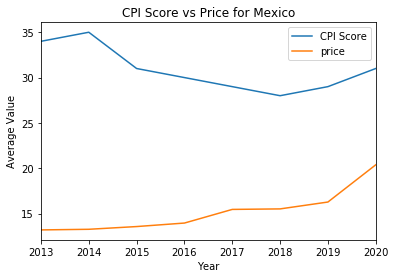

In [10]:
#Plot Mexico Correlation between CPI and Price
ax = MexicoData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Mexico')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

In [11]:
#Check for Correlation
column_1 = MexicoData["CPI Score"]
column_2 = MexicoData["price"]
correlation = column_1.corr(column_2)
print(correlation)

-0.38839178996677165


Text(0,0.5,'Average Value')

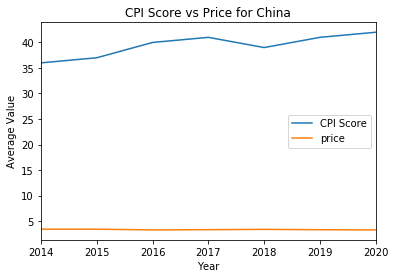

In [12]:
#Plot China Correlation between CPI and Price
ax = ChinaData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for China')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

In [13]:
#Check for Correlation
column_1 = ChinaData["CPI Score"]
column_2 = ChinaData["price"]
correlation = column_1.corr(column_2)
print(correlation)

-0.9113634869979309


Text(0,0.5,'Average Value')

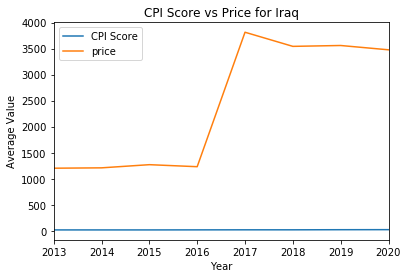

In [14]:
#Plot Iraq Correlation between CPI and Price
ax = IraqData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Iraq')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

In [15]:
#Check for Correlation
column_1 = IraqData["CPI Score"]
column_2 = IraqData["price"]
correlation = column_1.corr(column_2)
print(correlation)

0.8117274052138735


Text(0,0.5,'Average Value')

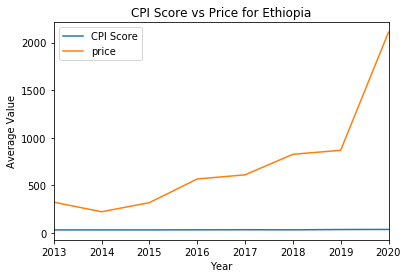

In [16]:
#Plot Ethiopia Correlation between CPI and Price
ax = EthiopiaData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Ethiopia')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

In [17]:
#Check for Correlation
column_1 = EthiopiaData["CPI Score"]
column_2 = EthiopiaData["price"]
correlation = column_1.corr(column_2)
print(correlation)

0.8760659818945472


## Categorical Analysis
Explain the ways we broke up the data

### Dairy Analysis

The dairy products have been selected via an online list from https://www.listchallenges.com/. Each food item included the name, price, country of origin, and the date of said price. All of the data was converted to lowercase and any detailed post-fixes were removed to allow smoother merging for analysis sake

In [18]:
#Calculate the Average Price for each Country with only the Dairy Dataset
#Then check for correlation of the values
#Separate the Dairy Dataset by country
DairyProductGroups = MergedData[MergedData['Item'].isin(Categories['Dairy'])] #Dairy Dataset

#Datasets based on Country
SudanData = DairyProductGroups[DairyProductGroups['Country'].isin(['sudan'])]
MexicoData = DairyProductGroups[DairyProductGroups['Country'].isin(['mexico'])]
ChinaData = DairyProductGroups[DairyProductGroups['Country'].isin(['china'])]
IraqData = DairyProductGroups[DairyProductGroups['Country'].isin(['iraq'])]
EthiopiaData = DairyProductGroups[DairyProductGroups['Country'].isin(['ethiopia'])]

#Get Average Price
SudanData =  SudanData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
MexicoData = MexicoData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
ChinaData = ChinaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
IraqData = IraqData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
EthiopiaData = EthiopiaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})

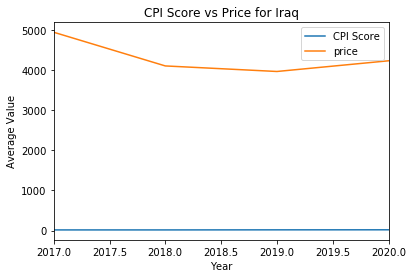

In [19]:
#Plot Iraq Correlation between CPI and Price
ax = IraqData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Iraq')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

#Check for Correlation
column_1 = IraqData["CPI Score"]
column_2 = IraqData["price"]
correlation_iraq = column_1.corr(column_2)

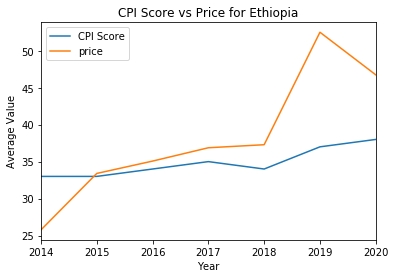

In [20]:
#Plot Ethiopia Correlation between CPI and Price
ax = EthiopiaData.plot(x='Year', y=['CPI Score','price'], title = 'CPI Score vs Price for Ethiopia')
ax.set_xlabel("Year")
ax.set_ylabel("Average Value")

#Check for Correlation
column_1 = EthiopiaData["CPI Score"]
column_2 = EthiopiaData["price"]
correlation_ethiopia = column_1.corr(column_2)

In [22]:
#Show all correlations
print("Iraq:", correlation_iraq, "\nEthiopia:", correlation_ethiopia)

Iraq: -0.474342978812104 
Ethiopia: 0.8974296107188423


### Grains Analysis

### Meat Analysis

Meat products where also selected from the online list talked about above. 

### Vegetables and Fruits Analysis